In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from urllib.request import urlopen
from zipfile import ZipFile
from io import BytesIO
from collections import Counter


Q1

In [2]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
X = data.iloc[:,0:14]

In [4]:
def helper(x):
    if ('<=' in x):
        return 0
    else:
        return 1
    
y = [helper(x) for x in data.iloc[:,14]]

In [5]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

from sklearn import datasets
from statsmodels.api import Logit, MNLogit
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelBinarizer

import matplotlib.pyplot as plt

Logistic regression

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

model = LogisticRegression(C=100,
                           tol=1e-1,
                           penalty='l2',
                           solver='newton-cg',
                           fit_intercept=False,
                           max_iter=8500)
result = model.fit(X_train,y_train)

predicted = model.predict(X_test)
real = y_test

print(accuracy_score(predicted,y_test))
confusion_matrix(real,predicted)

ValueError: could not convert string to float: ' Private'

In [7]:
model.score(X_test,y_test)

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

SVM

In [8]:
from sklearn.svm import LinearSVC,SVC
from sklearn.preprocessing import MinMaxScaler

In [9]:
model1 = SVC(C=1.1,
             degree=2,
             kernel='poly',
             max_iter=125000,
             tol=1e-4)
model1.fit(X_train,y_train)

predicted = model1.predict(X_test)

print(accuracy_score(predicted,y_test))
confusion_matrix(predicted,y_test)

ValueError: could not convert string to float: ' Private'

KNN

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import chisquare

In [11]:
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train,y_train)
predicted = model.predict(X_test)
cm = confusion_matrix(y_test,predicted)

ValueError: could not convert string to float: ' Private'

In [12]:
model.score(X_test,y_test)

ValueError: could not convert string to float: ' Private'

In [13]:
chisquare(cm,axis=None)

NameError: name 'cm' is not defined

Decision tree

In [14]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree

xtrain,xtest,ytrain,ytest = train_test_split(X,y)

model1 = DecisionTreeClassifier(max_depth=3,criterion='gini')

model1.fit(xtrain,ytrain)
model1.score(xtest,ytest)

ValueError: could not convert string to float: ' Private'

In [15]:
plt.figure(figsize=(20,20), dpi=240)
tree.plot_tree(model1,
               filled = True)

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

<Figure size 4800x4800 with 0 Axes>

Gradient Boost (XGBoost)

In [16]:
import xgboost as xgb

In [17]:
from scipy.stats import t

def doExperiment(X,y,model,ts=0.2):
    xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=ts)
    model.fit(xtrain,ytrain)
    return model.score(xtest,ytest)

In [18]:
N = 5
experiments = np.array([doExperiment(X,y,xgb.XGBRegressor()) for i in range(N)])
t.interval(0.95,N-1,loc=experiments.mean(),scale=experiments.var())

ValueError: DataFrame.dtypes for data must be int, float, bool or category.  When
categorical type is supplied, DMatrix parameter `enable_categorical` must
be set to `True`. Invalid columns:1, 3, 5, 6, 7, 8, 9, 13

Neural network

In [19]:
from sklearn.preprocessing import LabelBinarizer
import keras as ks
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, LSTM, Embedding
from keras.utils import np_utils

In [20]:
labeler = LabelBinarizer()
y = labeler.fit_transform(y)

x_train, x_test, y_train, y_test = train_test_split(X, y)

In [21]:
y_train

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [0]])

In [22]:
model = ks.models.Sequential()

model.add(ks.layers.Dense(64, activation='relu', input_dim=4))
model.add(ks.layers.Dense(3,activation='sigmoid'))

Q2

In [23]:
with urlopen('https://archive.ics.uci.edu/ml/machine-learning-databases/00602/DryBeanDataset.zip') as url:
    zf = ZipFile(BytesIO(url.read()))
    data = pd.read_excel(zf.open('DryBeanDataset/Dry_Bean_Dataset.xlsx'))
    
data

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [24]:
X = data.iloc[:,0:16]
y = data.iloc[:,16]

In [25]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
dtypes: float64(14), int64(2)
memory usage: 1.7 MB


Logistic Regression

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

model2 = LogisticRegression(max_iter=8500,solver='saga')

model2.fit(X_train,y_train)

predicted = model2.predict(X_test)
print(accuracy_score(predicted,y_test))
confusion_matrix(predicted,y_test)

0.6426682339112548


array([[ 95,   1,  80,   0,  12,   0,   1],
       [  0, 135,   0,   0,   0,   0,   0],
       [164,   2, 294,   0,  10,   0,   0],
       [  0,   0,   0, 858,  56, 217, 202],
       [ 41,   0,  10,   1, 215,   1,  46],
       [  2,   0,   3,  13,   4, 218,  61],
       [ 14,   0,  13,   3, 192,  67, 372]], dtype=int64)

SVM

In [27]:
model1 = SVC(C=1.1,
             degree=2,
             kernel='poly',
             max_iter=125000,
             tol=1e-4)
model1.fit(X_train,y_train)

predicted = model1.predict(X_test)

print(accuracy_score(predicted,y_test))
confusion_matrix(predicted,y_test)

0.635321774904496


array([[ 64,   0,  74,   0,  42,   0,   1],
       [  0, 137,   0,   0,   0,   0,   0],
       [159,   1, 300,   0,   7,   0,   0],
       [  0,   0,   0, 763,   8, 181,  44],
       [ 84,   0,  24,   0, 295,  12,  66],
       [  0,   0,   0,  98,  13, 154, 122],
       [  9,   0,   2,  14, 124, 156, 449]], dtype=int64)

KNN

In [28]:
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train,y_train)
predicted = model.predict(X_test)
cm = confusion_matrix(y_test,predicted)

In [29]:
model.score(X_test,y_test)

0.7152512488980312

In [30]:
chisquare(cm,axis=None)

Power_divergenceResult(statistic=14452.856303261828, pvalue=0.0)

Decision tree

In [31]:
from sklearn.tree import DecisionTreeClassifier
xtrain,xtest,ytrain,ytest = train_test_split(X,y)

model1 = DecisionTreeClassifier(max_depth=3,criterion='gini')

model1.fit(xtrain,ytrain)
model1.score(xtest,ytest)

0.7757860711137232

[Text(930.0, 1585.5, 'X[2] <= 280.704\ngini = 0.828\nsamples = 10208\nvalue = [985, 400, 1241, 2659, 1437, 1550, 1936]'),
 Text(465.0, 1132.5, 'X[12] <= 0.007\ngini = 0.539\nsamples = 4311\nvalue = [2, 0, 0, 2531, 11, 1435, 332]'),
 Text(232.5, 679.5, 'X[14] <= 0.727\ngini = 0.226\nsamples = 1558\nvalue = [2, 0, 0, 89, 1, 1364, 102]'),
 Text(116.25, 226.5, 'gini = 0.609\nsamples = 178\nvalue = [0, 0, 0, 55, 1, 30, 92]'),
 Text(348.75, 226.5, 'gini = 0.065\nsamples = 1380\nvalue = [2, 0, 0, 34, 0, 1334, 10]'),
 Text(697.5, 679.5, 'X[1] <= 711.314\ngini = 0.206\nsamples = 2753\nvalue = [0, 0, 0, 2442, 10, 71, 230]'),
 Text(581.25, 226.5, 'gini = 0.096\nsamples = 2223\nvalue = [0, 0, 0, 2112, 5, 67, 39]'),
 Text(813.75, 226.5, 'gini = 0.482\nsamples = 530\nvalue = [0, 0, 0, 330, 5, 4, 191]'),
 Text(1395.0, 1132.5, 'X[14] <= 0.53\ngini = 0.79\nsamples = 5897\nvalue = [983, 400, 1241, 128, 1426, 115, 1604]'),
 Text(1162.5, 679.5, 'X[3] <= 215.311\ngini = 0.134\nsamples = 1378\nvalue = [8, 6

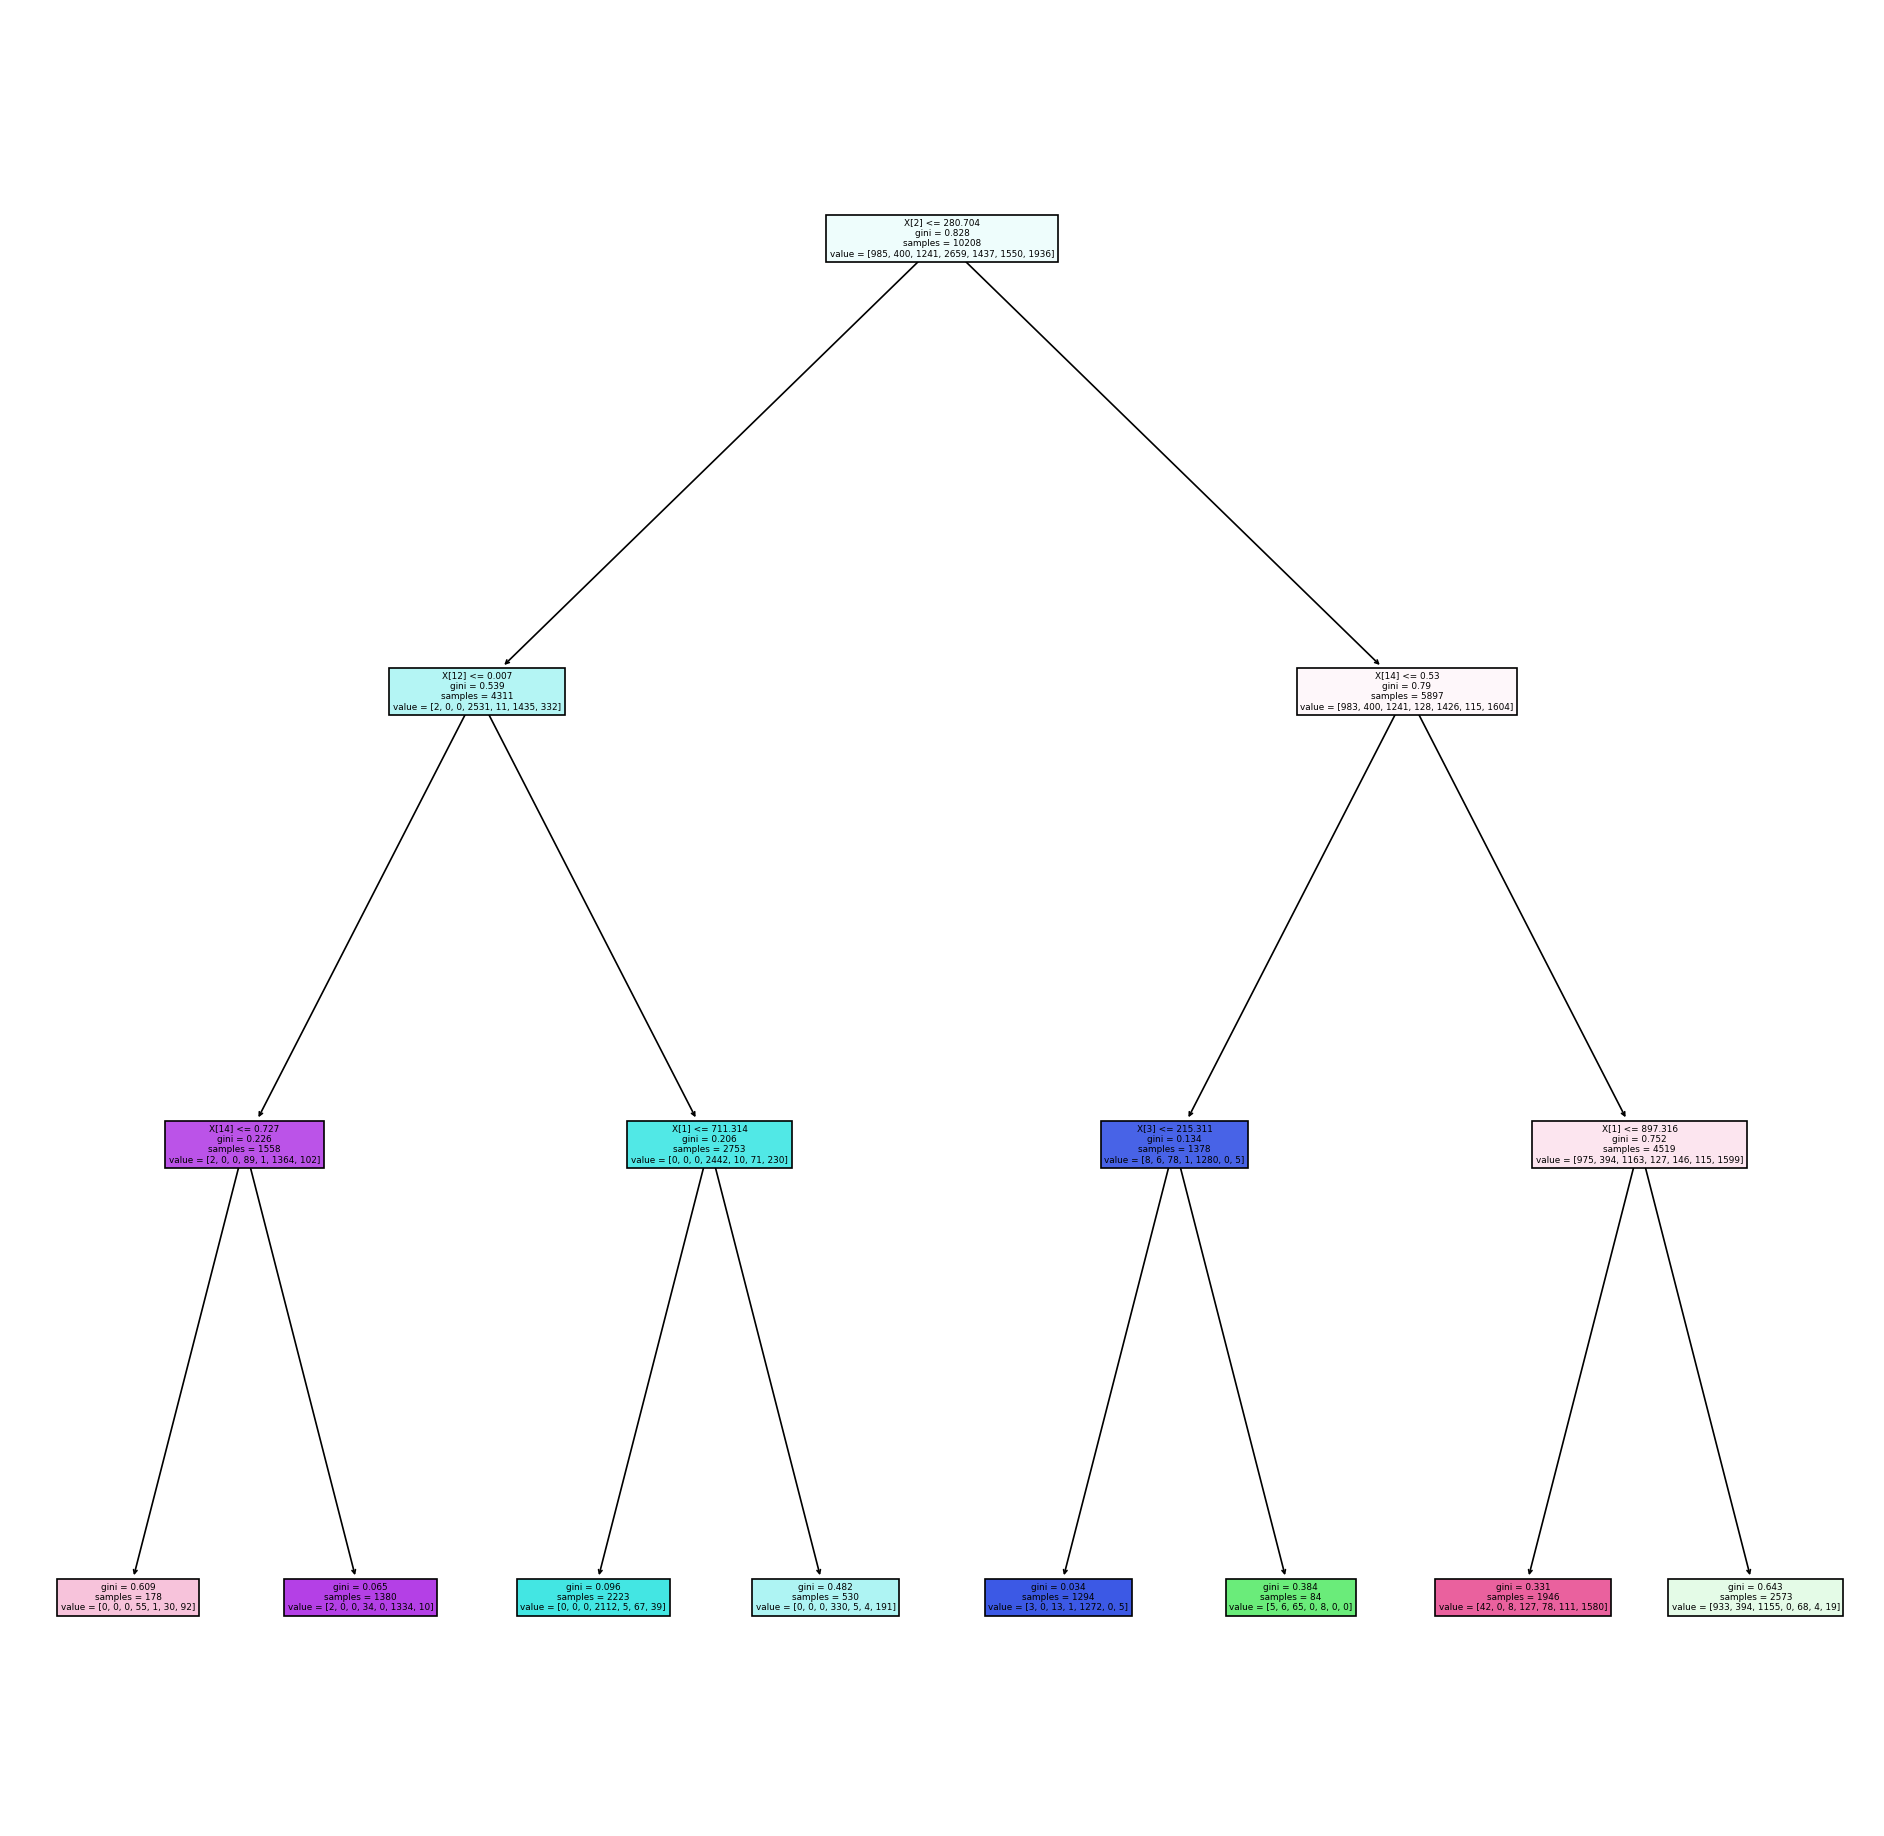

In [32]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(20,20), dpi=120)
tree.plot_tree(model1,
               filled = True)

Neural network

In [33]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras as ks

from sklearn.datasets import load_iris, load_digits, fetch_20newsgroups_vectorized
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

from keras.datasets import mnist, fashion_mnist
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, LSTM, Embedding
from keras.utils import np_utils

import matplotlib.pyplot as plt

In [35]:
labeler = LabelBinarizer()
a = labeler.fit_transform(y)

x_train, x_test, y_train, y_test = train_test_split(X,a)

In [36]:
y_train

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [37]:
model = ks.models.Sequential()

model.add(ks.layers.Dense(64, activation='relu', input_dim=4))
model.add(ks.layers.Dense(3,activation='sigmoid'))